<h1>Сборный проект</h1>
В рамках проекта проанализируем данные о продажах он-лайн магазин игр. Определим основные и перспективыне игровые платформы, жанры. Оценим влияние отзывов пользователей и критиков на объемы продаж. Соберем портрет типичнго пользователся в различных регионах и проверим гипотезу об объемах продаж для различных жанров и платформ.
<h2>Предобработка данных</h2>

Импортируем необходимые библиотеки и средства для дальнейшей работы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Откроем файл данных, выведем первые 10 строчек в таблицу и описание датасета

In [2]:
df=pd.read_csv('/datasets/games.csv')
display(df.head(10))
print(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Переименуем заголовки таблиц, приведем все к нижнему регистру

In [3]:
df=df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre',
                     'NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales',
                     'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})
display(df.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверим наличие явных дубликатов

In [4]:
print('Обнаружено и удалено дубликатов:', df.duplicated().sum())


Обнаружено и удалено дубликатов: 0


In [5]:
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Приведем название платформ, жанр и названия игр к нижнему регистру 

In [6]:
df['genre']=df['genre'].str.lower()
df['platform']=df['platform'].str.lower()
df['name']=df['name'].str.lower()

<h3>Заполнение пропусков</h3>
Заполним или ликвидируем пропуски.
<br>Поле name, не имеющее значений, нам не интересно, данные строки логично удалить.

In [7]:
df=df.dropna(subset=['name'])
print(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


Пропущенные значения года выпуска можно заменить на медианные для всей выборки

In [8]:
#убираем строки с играми без года выпуска
df=df.dropna(subset=['year_of_release'])

In [9]:
print(df['year_of_release'].median())
df['year_of_release']=df['year_of_release'].fillna(df['year_of_release'].median())
print(df.isna().sum())

2007.0
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


Конвертируем типы данных. Заменим тип данных в столбце year_of_release на int (год - только целое число), а в столбце user_score на float (оценка - дробное число)

In [10]:
df['year_of_release']=df['year_of_release'].astype('int')
#заменим значения tbd на NaN
df.loc[df['user_score']=='tbd','user_score']=np.nan
df['user_score']=pd.to_numeric(df['user_score'])

Заполним пропуски в столбцах с оценкой медианными оценками игр аналогичного жанра

In [11]:
#df['user_score'] = df['user_score'].fillna(df.groupby('genre')['user_score'].transform('median'))
#df['critic_score'] = df['critic_score'].fillna(df.groupby('genre')['critic_score'].transform('median'))

In [12]:
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


In [13]:
print(df['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Значения рейтинг нечисловые, поэтому создадим функцию, которая находит значение рейтинга, которое встречается чаще всег ждля указанной игры и заполним их этим значением.

In [14]:
def my_mode(x):                  
    mode = x.mode()
    if len(mode) > 0:
        return mode[0]
    return None
df['rating'] = df['rating'].fillna(df.groupby('name')['rating'].transform(my_mode))
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6259
dtype: int64


Создадим отдельный столбец с продажами во всех регионах

In [15]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


На этом этапе этап предобработки данных завершен. Удалены 2 строки, которые, скорее всего, имели пропуски по всем параметрам и интереса не предоставляли. Заполнены пропуски для остальных строк, кроме рейтинга, который не удалось заполнить в полном объёме.

<h2>Исследовательский анализ данных</h2>

<h3>Анализ актуального временного диапазона и перспективных платформ</h3>

<AxesSubplot:xlabel='Year', ylabel='Sales'>

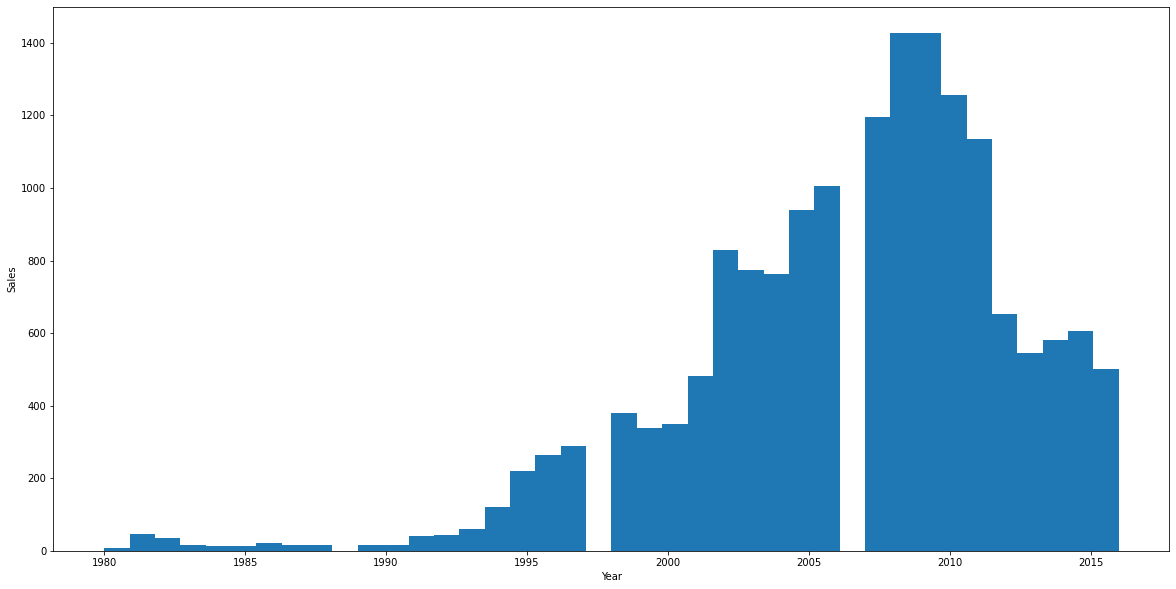

In [16]:
plt.figure(figsize=[20, 10])
plt.xlabel("Year")
plt.ylabel("Sales")
df['year_of_release'].hist(bins=40, grid=False)

Очевидно, что репрезентативаня выборка начинается примерно с 1990 года, и для дальнейшего исследования нам интересен этот интервал. 

Сделаем свод по продажам в разрезе по платформам, опрделим, какие из них имеют наибольшие суммарные продажи.

In [17]:
display(df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))
df_top=df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Для дальнеййшего рассмотрени целесообразно отобрать 10 первых платформ - такая выборка охватывает основные платформы, при этом снижение от платформы с самым большим значением продаж не превышает 5 раз + дополнитьельно добавим к рассмотрению XBoxOne

Построим для данных платформ распределнеие с выходом игр по годам

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds', 'pc', 'xone']
ps2


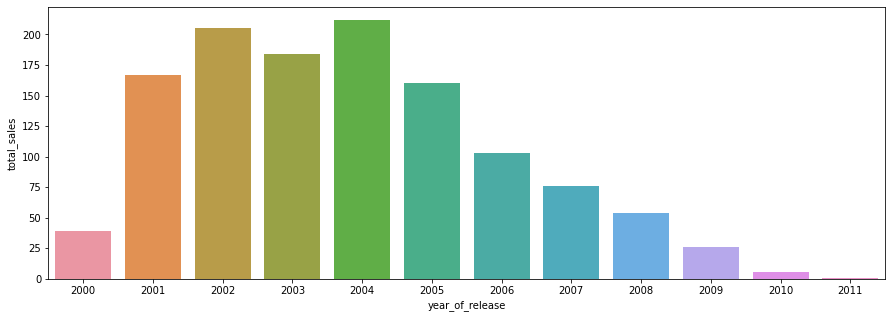

x360


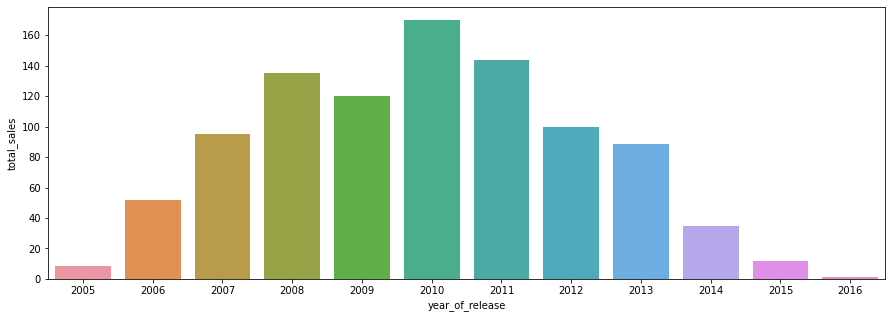

ps3


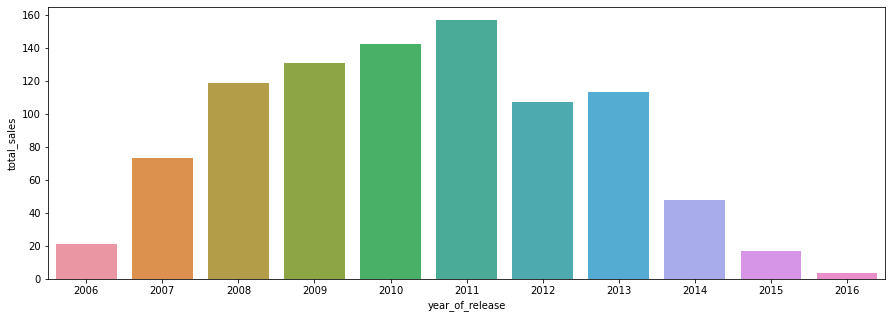

wii


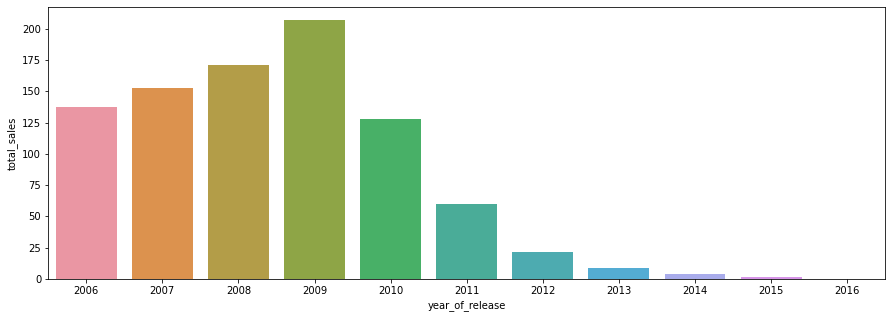

ds


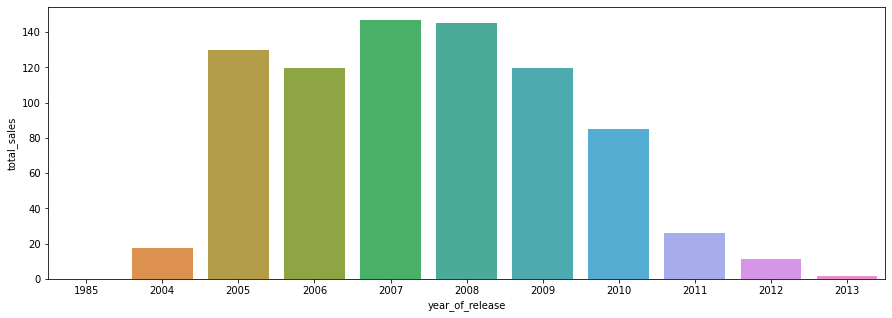

ps


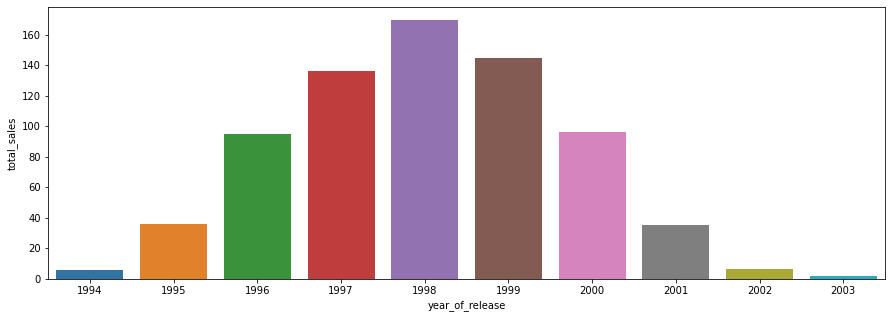

ps4


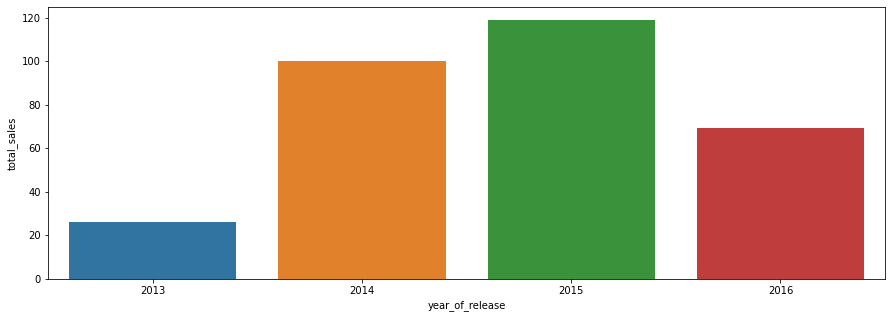

gba


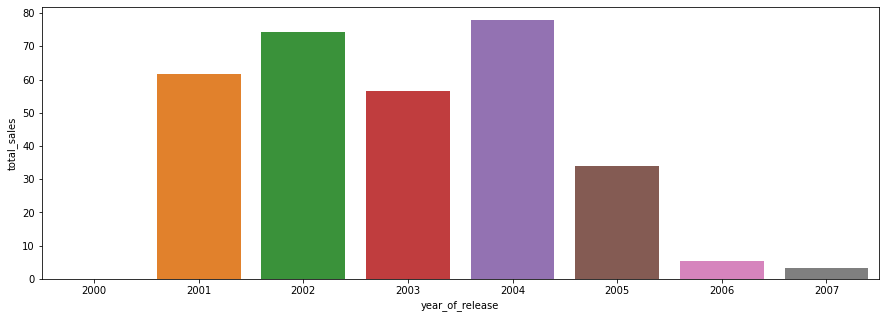

psp


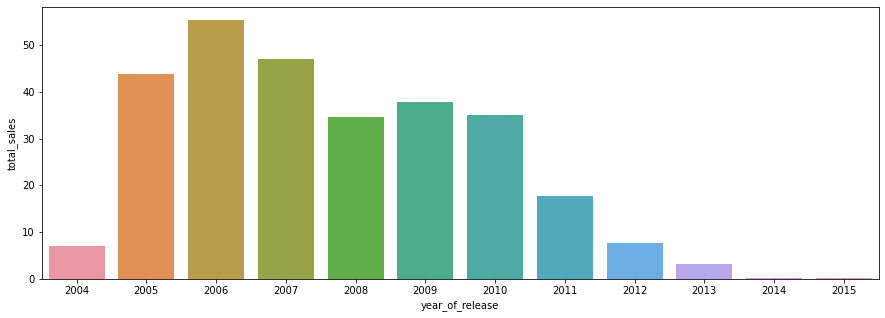

3ds


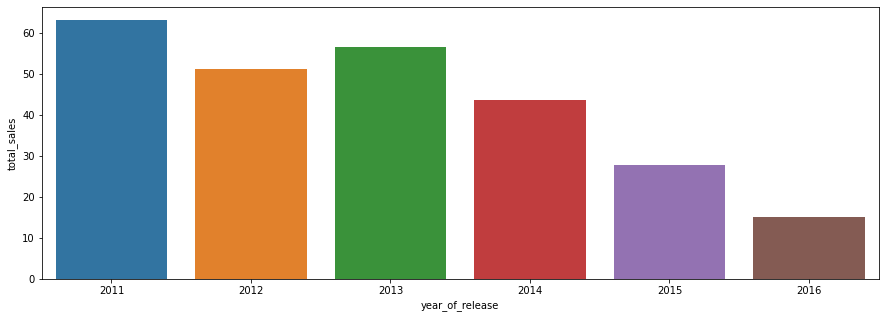

pc


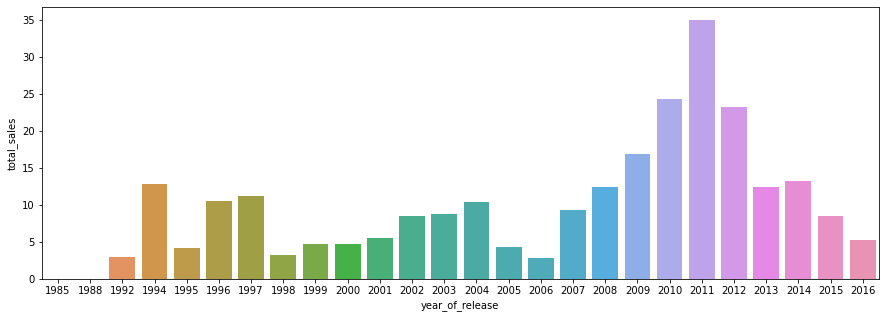

xone


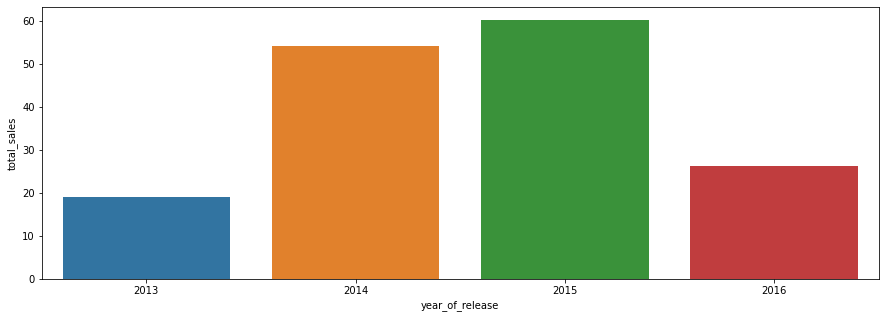

,platform,year_of_release,total_sales
0,3ds,2011,63.20
1,3ds,2012,51.36
2,3ds,2013,56.57
3,3ds,2014,43.76
4,3ds,2015,27.78
...,...,...,...
122,x360,2016,1.52
123,xone,2013,18.96
124,xone,2014,54.07
125,xone,2015,60.14


In [18]:
#сформируем список из топ-10 платформ
top_platform=[]
for i in range(0,11):
    top_platform.append(df_top.index[i])
top_platform.append('xone')
print(top_platform) 
#сформируем список из топ-10 платформ
#сформируем итоговую таблицу и построим распределение с выходом игр по годам
df_top_10_pivot=df.query('platform in @top_platform').groupby(['platform','year_of_release']).agg({'total_sales':'sum'}).reset_index()

for each_platform in top_platform:
    print(each_platform)
    plt.figure(figsize=[15, 5])
    sns.barplot(x="year_of_release", y="total_sales", data=df_top_10_pivot[df_top_10_pivot['platform']==each_platform], ci=None)
    plt.show()
display(df_top_10_pivot)

<h4>Промежуточный вывод</h4>
Наибольшее количество продаж - не меньше половины от максимального - имеют первые 6 платформ, но часть из них была популярна в более ранние годы, по'тому для оценки и прогнозирования продаж на 2017 год мы расширили выборку до 10 платформ.
<br>В среднем, по данным графикам можно сделать вывод о том, <b>что средний срок жизни/популярности платформы составляет около 8 лет.</b>
<br>Лидирующая по суммарным продажам платформа PS2 падает и достигла минимума в 2011 году, таким образом, на 2017 год эта палтформа неперспективная и нерелевантна для дальнейшего прогнозирования. В среднем, платформа достигает пика на 4-5 год то начала продаж, далее начинается ее спад. Примерно за 3 года платформа "умирает", - вытесняется конкурентами, либо заменяется олее новой. Таким образом, <b>актуальным диапазоном будут годы с 2014 по 2016 годы включительно.</b>
<br>Среди менее популярных, но относительно новых и релевантных программ <b>интересны платформы: PS4, 3ds, XOne и PC.</b> 
<br>Причем, PS4 и XOne вероятно наиболее персективные из них по причине новизны и наибольшего объема продаж в 2016 году.
<br>Проверим дополнилеьно суммарные объемы продаж по платформам в актуальном периоде

In [19]:
display(df.query('year_of_release >= 2014')
        .pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


<br><b>Итоговый перечень перспективных платформ: PS4, 3DS, XONE, PC</b>. Платформы PS3 и X360 еще находятся достаточно высоко в топе продаж, но, судя по динамике, уже уходят с рынка.
<br><b>В дальнейшем, используем датафрейм для актуального периода, начиная с 2014 года включительно.</b>

Построим диаграмму размаха ("ящик с усами") по глобальным продажам игр в разбивке по платформам

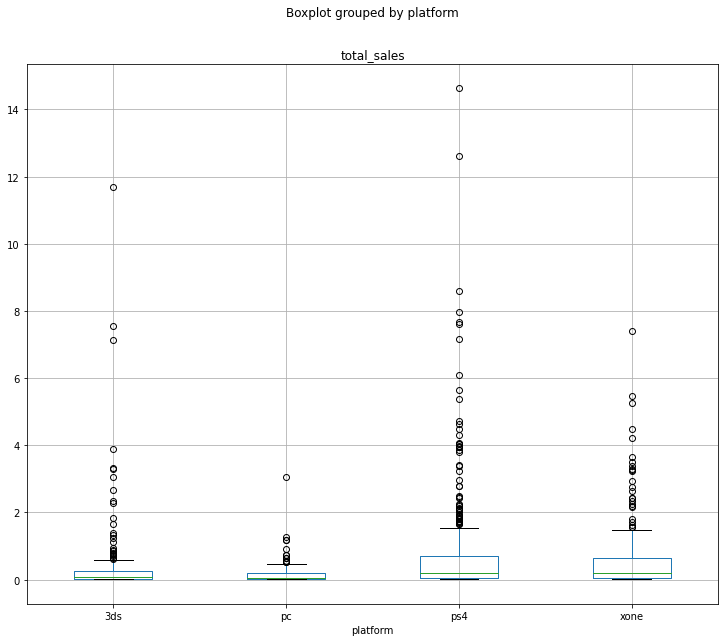

In [20]:
#np.random.seed(1234)
#df = pd.DataFrame(np.random.randn(10, 4),
#                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
df=df.query('year_of_release >= 2014')
actual=df.query('platform in ["ps4","3ds","xone","pc"]')
boxplot = actual.boxplot(column='total_sales', by='platform', figsize=(12,10))  

Построим дополнительный график в масштабе, не учитывающем выбросов:

(0.0, 1.1)

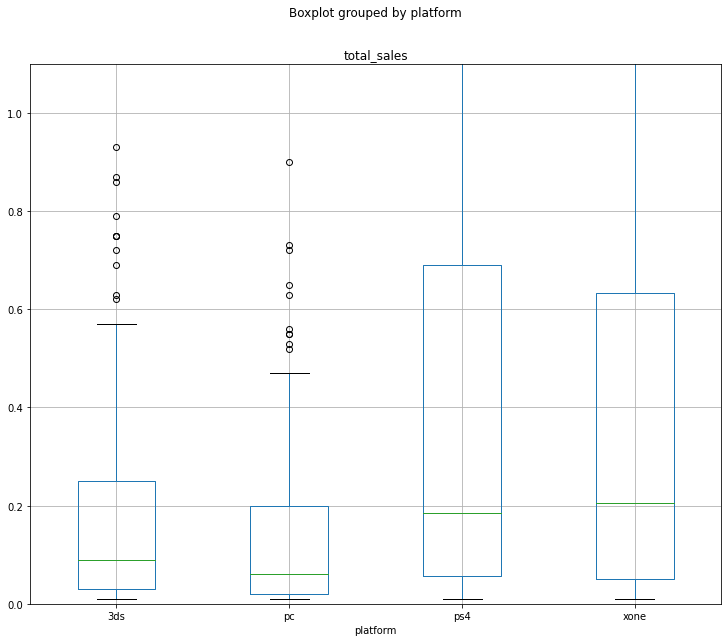

In [21]:
boxplot = actual.boxplot(column='total_sales', by='platform', figsize=(12,10))  
plt.ylim(0, 1.1)

<h4>Промежуточный вывод</h4>
<br>Наиболее высокие значения медианных продаж на рассматриваемом периоде имеют наиболее перспективные платформы - PS4 и Xone. При этом, с учетом того, что средние показатели, в приницпе сопоставимы, для PS4 и 3ds характерны большие забросы по продажам для некотрых игр, что говорит о том, что на этих платформах выходили очень популярные игры. Для остальных платформ игры с такой популярностью отсутствуют.
<br>Медианные значения и величина 75% квартиля для платформ PS4 и Xone выше, чем для 3ds и PC, то есть в среднем игры на этих платформах более популярны и продаются больше. Что дополнитьлеьно подтверждает наш тезис о популярности и перспективности платформ PS4 и Xone.

<h3>Определение корреляции между отзывам и продажами внутри одной из популярных платформ</h3>
<br>Возьмем платформу PS4 и для нее построим график корреляции продаж и отзывов пользователей и критиков отдельно. Дополнительно определим коэффициент корреляции Пирсона для каждого из вариантов.

Корреляция отзывов игроков и продаж для платформы
Коэффициент корреляции -0.040131589472697356


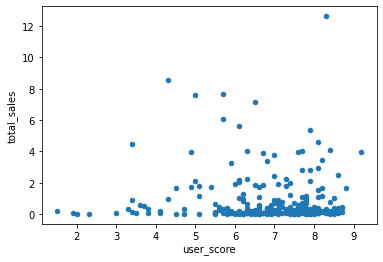

In [22]:
print('Корреляция отзывов игроков и продаж для платформы')
df.query('platform == "ps4"').plot(x='user_score',y='total_sales',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "ps4"')['user_score'].corr(df.query('platform == "ps4"')['total_sales']))

Корреляция отзывов критиков и продаж для платформы
Коэффициент корреляции 0.40266141068104083


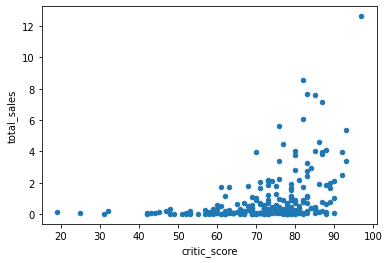

In [23]:
print('Корреляция отзывов критиков и продаж для платформы')
df.query('platform == "ps4"').plot(x='critic_score',y='total_sales',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "ps4"')['critic_score'].corr(df.query('platform == "ps4"')['total_sales']))

Дополнительно проверим, насколько в принципе коррелируют между собо отзывы критиков и игроков

Корреляция отзывов критиков и пользователей для платформы
Коэффициент корреляции 0.546434245119031


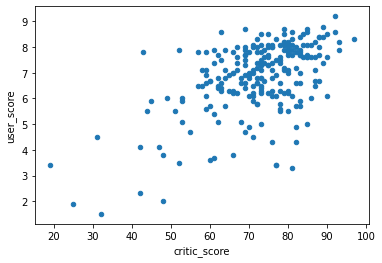

In [24]:
print('Корреляция отзывов критиков и пользователей для платформы')
df.query('platform == "ps4"').plot(x='critic_score',y='user_score',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "ps4"')['critic_score'].corr(df.query('platform == "ps4"')['user_score']))

<h4>Промежуточный вывод</h4>
<br>Отызвы пользователей имеют слабоотрицательную корреляцию с объемом продаж, из разброса явно видно, что есть популярные игры, которые игрокам на данной палтформе не нарвятся. Отзывы критико имеют полжительную корреляцию с уровнем продаж, возможно за счёт более глубокого понимания и опыта оценки игр. В целом, отзывы критиков и пользователей между собой коррелируют.

Проверим аналогичным образом наши выводы для двух других платформ - возьмем XOne и 3ds.
<br><b>Для XOne</b>

Корреляция отзывов игроков и продаж для платформы
Коэффициент корреляции -0.0703839280647581


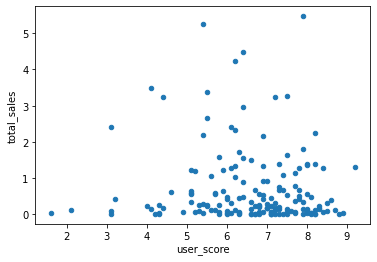

In [25]:
print('Корреляция отзывов игроков и продаж для платформы')
df.query('platform == "xone"').plot(x='user_score',y='total_sales',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "xone"')['user_score'].corr(df.query('platform == "xone"')['total_sales']))

Корреляция отзывов критиков и продаж для платформы
Коэффициент корреляции 0.42867694370333226


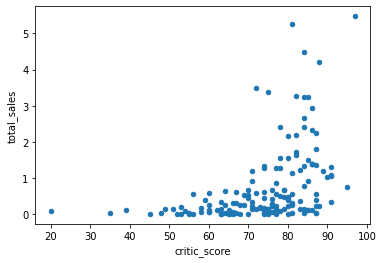

In [26]:
print('Корреляция отзывов критиков и продаж для платформы')
df.query('platform == "xone"').plot(x='critic_score',y='total_sales',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "xone"')['critic_score'].corr(df.query('platform == "xone"')['total_sales']))

Корреляция отзывов критиков и пользователей для платформы
Коэффициент корреляции 0.4409773483764412


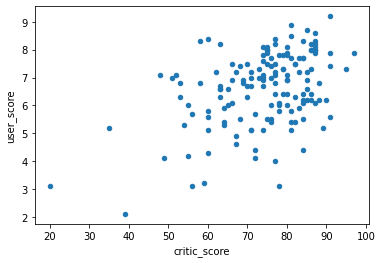

In [27]:
print('Корреляция отзывов критиков и пользователей для платформы')
df.query('platform == "xone"').plot(x='critic_score',y='user_score',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "xone"')['critic_score'].corr(df.query('platform == "xone"')['user_score']))

<h4>Промежуточный вывод</h4>
<br>Аналогично предыдущей платформе (ps4), отызвы пользователей имеют слабоотрицательную корреляцию с объемом продаж, а отзывы критиков - полжительную корреляцию. Отзывы критиков и пользователей также между собой коррелируют.

<b>Для 3ds</b>

Корреляция отзывов игроков и продаж для платформы
Коэффициент корреляции 0.2151932718527028


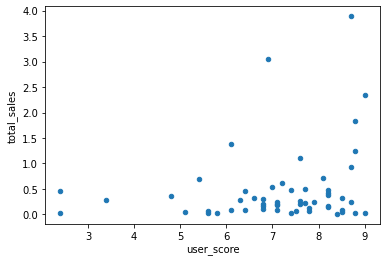

In [28]:
print('Корреляция отзывов игроков и продаж для платформы')
df.query('platform == "3ds"').plot(x='user_score',y='total_sales',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "3ds"')['user_score'].corr(df.query('platform == "3ds"')['total_sales']))

Корреляция отзывов критиков и продаж для платформы
Коэффициент корреляции 0.314117492869051


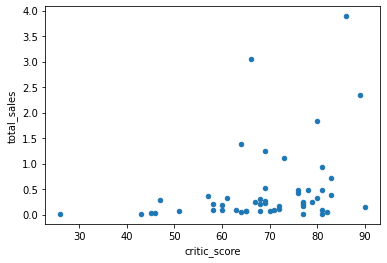

In [29]:
print('Корреляция отзывов критиков и продаж для платформы')
df.query('platform == "3ds"').plot(x='critic_score',y='total_sales',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "3ds"')['critic_score'].corr(df.query('platform == "3ds"')['total_sales']))

Корреляция отзывов критиков и пользователей для платформы
Коэффициент корреляции 0.862484552934546


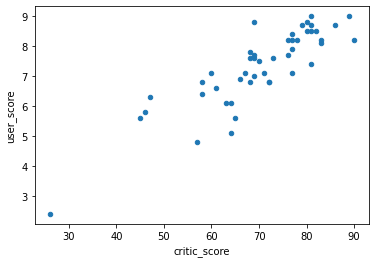

In [30]:
print('Корреляция отзывов критиков и пользователей для платформы')
df.query('platform == "3ds"').plot(x='critic_score',y='user_score',kind='scatter')
print('Коэффициент корреляции',df.query('platform == "3ds"')['critic_score'].corr(df.query('platform == "3ds"')['user_score']))

В целом, выводы для первой платформы (PS4) справедливы и для остальных двух. Но при этом, PS4 и XOne имеет слабоотрицательную корреляцию между отзывами поьзователей и продажами, в от 3ds, где она слабоположительная. Это может быть вызвано относительной новизной платформ и меньшим количеством игр и продаж в принципе.

<h3>Распределние продаж игр по жанрам</h3>
Рассмотрим общее распределение игр по жанрам. Построим диаграмму рассеяния продаж в зависимости от жанров


<AxesSubplot:xlabel='genre', ylabel='total_sales'>

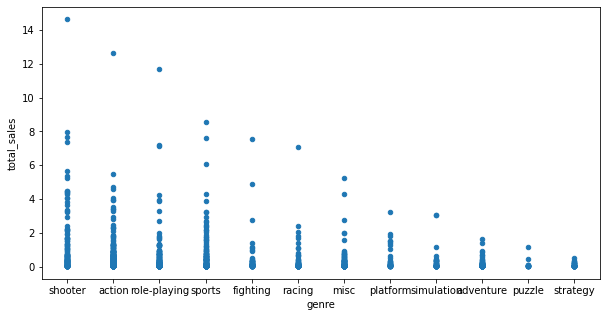

In [31]:
df.plot(x='genre',y='total_sales',kind='scatter',figsize=(10,5))

Дополнительно построим график зависимости среднего объема продаж от жанра

<AxesSubplot:xlabel='genre'>

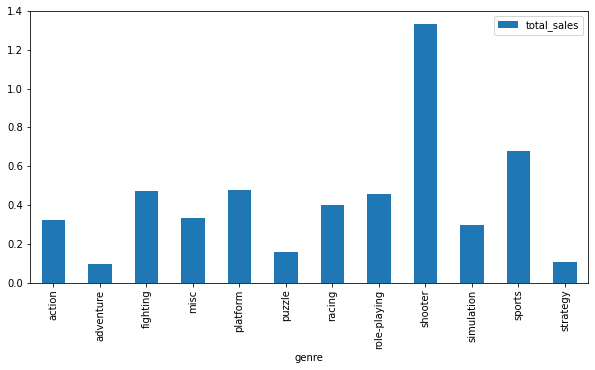

In [32]:
df.pivot_table(index='genre', values='total_sales', aggfunc='mean').plot(kind='bar',figsize=(10,5))

<h4>Промежуточный вывод</h4>
<br>По суммарным показателям привыли явно выделяются по объемам продаж игры в жанрах Sports, Platform и Racing, они являются самыми популярными и, очевидно, прибыльными. Низкие продажи имеют игры жанров Fighting, Adventure и Strategy.
<br>Однако, по средней выручке лидируют другие жанры - <b>Shooter, Sports и Platform</b>. Что говорит о том, что в жанре Shooter преобладают игры с большими средними продажами, но представленные в небольшом количестве, а в жанре Racing - много игр, но они мало популярны и в среднес имеют более низкие показатели продаж. Таким образом, игры жанров <b>Shooter, Sports и Platform</b> считаем наиболее популярными.

<h2>Портрет пользователя для каждого региона</h2>

<h3>Анализ популярности платформ</h3>

<br><b>Определим топ-5 самых популярных платформ для каждого региона и построим круговую диаграмму</b>

In [33]:
#NA region
df_platf_na=df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
#EU region
df_platf_eu=df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
#JP region
df_platf_jp=df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(df_platf_na.head(5), df_platf_eu.head(5), df_platf_jp.head(5))

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


Регион NA
Регион EU
Регион JP


array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

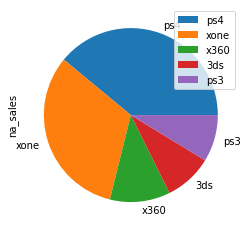

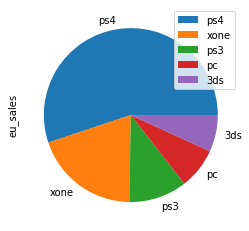

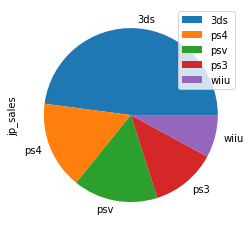

In [34]:
print('Регион NA')
df_platf_na.query('platform in ["ps4","xone","x360","3ds","ps3"]').plot(kind='pie',subplots=True)
print('Регион EU')
df_platf_eu.query('platform in ["ps4","xone","ps3","pc","3ds"]').plot(kind='pie',subplots=True)
print('Регион JP')
df_platf_jp.query('platform in ["3ds","ps4","psv","ps3","wiiu"]').plot(kind='pie',subplots=True)

Регион NA
Регион EU
Регион JP


array([<AxesSubplot:title={'center':'jp_sales'}, xlabel='platform'>],
      dtype=object)

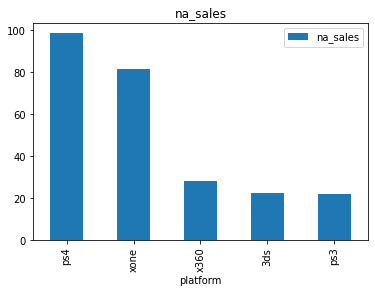

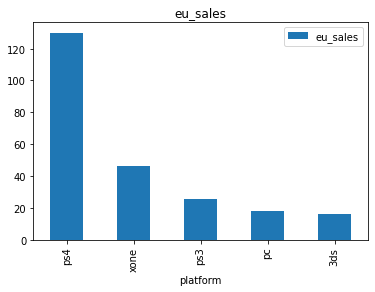

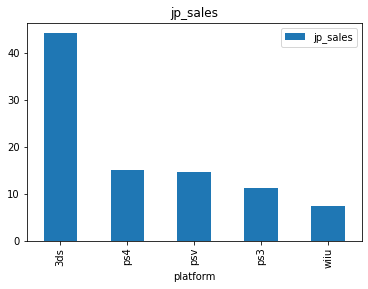

In [35]:
print('Регион NA')
df_platf_na.query('platform in ["ps4","xone","x360","3ds","ps3"]').plot(kind='bar',subplots=True)
print('Регион EU')
df_platf_eu.query('platform in ["ps4","xone","ps3","pc","3ds"]').plot(kind='bar',subplots=True)
print('Регион JP')
df_platf_jp.query('platform in ["3ds","ps4","psv","ps3","wiiu"]').plot(kind='bar',subplots=True)

<h4>Промежуточный вывод</h4>
Качественно стсоав топ-5 платформ занчительно отличается от региона к региону - в Северной Америке и Европе лидирует PS4, за котоой следует XOne, причем в Северной Америке показатели продаж для них сопоставимы. А в Японии лидером является 3ds, за котрой с большим отрывом следуют PS4 и PSV.

<h3>Анализ популярности жанров</h3>

<br><b>Определим топ-5 самых популярных жанров для каждого региона и построим столбчатую диаграмму</b>

In [36]:
#NA region
df_genre_na=df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
#EU region
df_genre_eu=df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
#JP region
df_genre_jp=df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(df_genre_na.head(5), df_genre_eu.head(5), df_genre_jp.head(5))

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


Регион NA
Регион EU
Регион JP


array([<AxesSubplot:title={'center':'jp_sales'}, xlabel='genre'>],
      dtype=object)

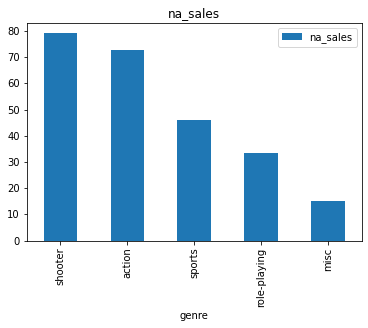

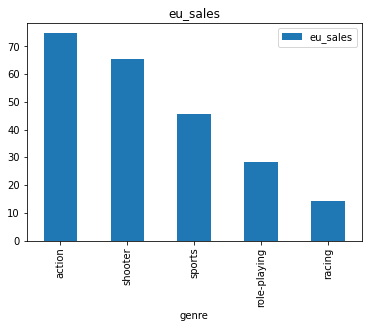

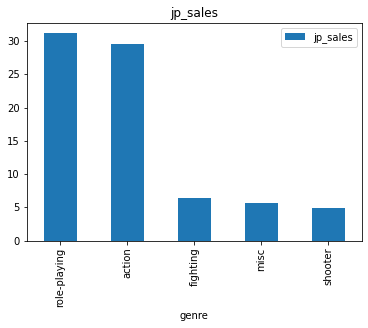

In [37]:
print('Регион NA')
df_genre_na.query('genre in ["action","sports","shooter","role-playing","misc"]').plot(kind='bar',subplots=True)
print('Регион EU')
df_genre_eu.query('genre in ["action","sports","shooter","racing","role-playing"]').plot(kind='bar',subplots=True)
print('Регион JP')
df_genre_jp.query('genre in ["role-playing","action","fighting","shooter","misc"]').plot(kind='bar',subplots=True)

<h4>Промежуточный вывод</h4>
Пользовательское поведение в части жанров игр для пользователей Северной Америки и Европы практически совпадает: лидируют жанры Action и Shooter (практически одинаковы), на третьем месте - жанр Sports.
<br>У пользователей из Японии характерно лидируют жанры RPG и Action, остальные 3 жанра значительно отстают.

<h3>Анализ влияния рейтинга ESRB на продажи в отдельном регионе </h3>

<b>Исследуем влияние рейтинга ESRB на продажи в отдельном регионе</b>
<br>Определим для каждого региона корреляцию рейтинга и продаж
<br><b>Регион NA</b>

<AxesSubplot:xlabel='rating'>

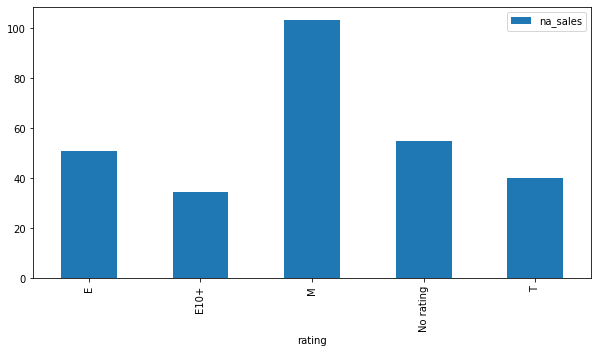

In [38]:
#Заполним строки с отсутствующим значением рейтинга
df['rating']=df['rating'].fillna('No rating')
df.pivot_table(index='rating',values='na_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))

<br><b>Регион EU</b>

<AxesSubplot:xlabel='rating'>

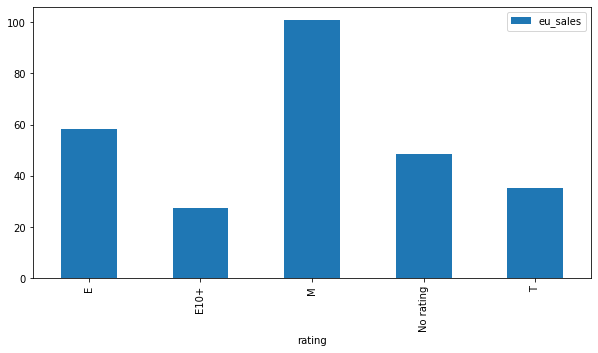

In [39]:
df.pivot_table(index='rating',values='eu_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))

<br><b>Регион JP</b>

<AxesSubplot:xlabel='rating'>

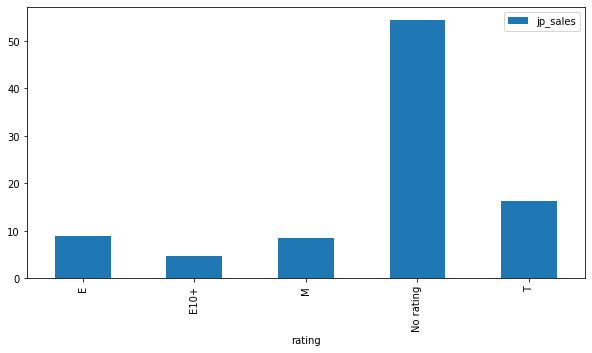

In [40]:
df.pivot_table(index='rating',values='jp_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))

<h4>Промежуточный вывод</h4>
<br>Рейтинг ESRB связан с количествоv продаж в региоахе Европа и Северная Америка - там лидируют игры с рейтингом М, а в регионе Япония лидирют игры, не отмеченные никаким из рейтингов ESRB. Возможно это связано с наличием собственной рейтинговой системы в Японии, которая отличается от ESRB.

Справочно, соберем пользовательские портреты для трёх разных регионах по рассмотренным выше параметрам

<br><b>Сводный портрет пользователя региона Северная Америка</b>

Предпочтения по платформам
Предпочтения по жанрам
Распределение по рейтингу ESRB


<AxesSubplot:xlabel='rating'>

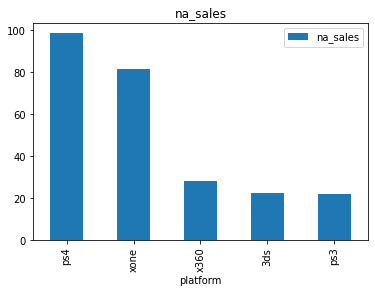

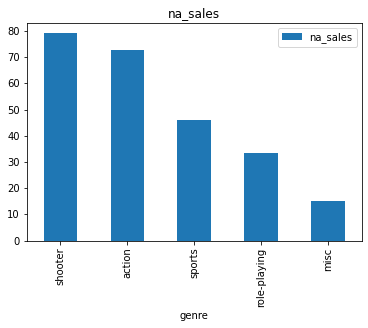

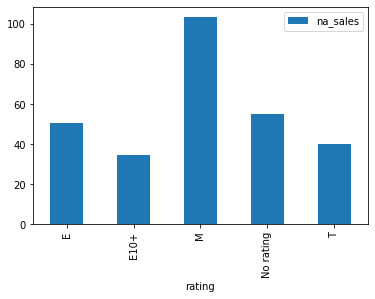

In [41]:
print('Предпочтения по платформам')
df_platf_na.query('platform in ["ps4","xone","x360","3ds","ps3"]').plot(kind='bar',subplots=True)
print('Предпочтения по жанрам')
df_genre_na.query('genre in ["action","sports","shooter","role-playing","misc"]').plot(kind='bar',subplots=True)
print('Распределение по рейтингу ESRB')
df.pivot_table(index='rating',values='na_sales', aggfunc='sum').plot(kind='bar')

<b>Сводный портрет пользователя региона Европа</b>

Предпочтения по платформам
Предпочтения по жанрам
Распределение по рейтингу ESRB


<AxesSubplot:xlabel='rating'>

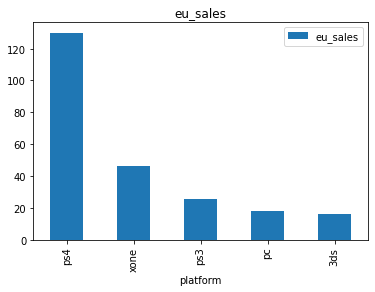

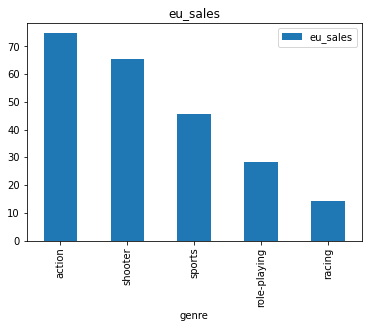

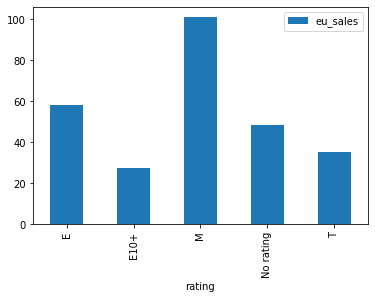

In [42]:
print('Предпочтения по платформам')
df_platf_eu.query('platform in ["ps4","xone","ps3","pc","3ds"]').plot(kind='bar',subplots=True)
print('Предпочтения по жанрам')
df_genre_eu.query('genre in ["action","sports","shooter","racing","role-playing"]').plot(kind='bar',subplots=True)
print('Распределение по рейтингу ESRB')
df.pivot_table(index='rating',values='eu_sales', aggfunc='sum').plot(kind='bar')

<b>Сводный портрет пользователя региона Япония</b>

Предпочтения по платформам
Предпочтения по жанрам
Распределение по рейтингу ESRB


<AxesSubplot:xlabel='rating'>

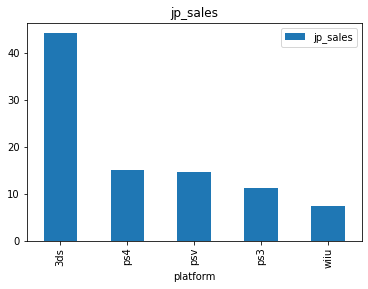

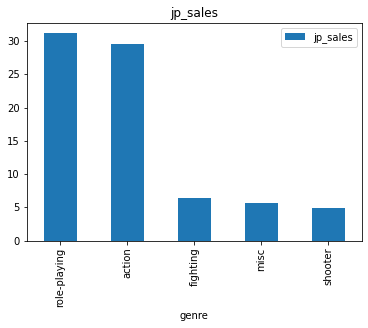

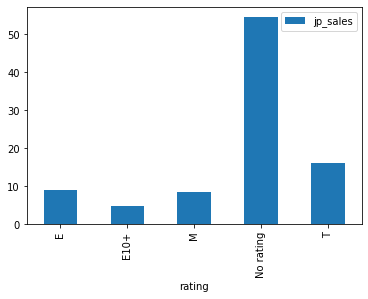

In [43]:
print('Предпочтения по платформам')
df_platf_jp.query('platform in ["3ds","ps4","psv","ps3","wiiu"]').plot(kind='bar',subplots=True)
print('Предпочтения по жанрам')
df_genre_jp.query('genre in ["role-playing","action","fighting","shooter","misc"]').plot(kind='bar',subplots=True)
print('Распределение по рейтингу ESRB')
df.pivot_table(index='rating',values='jp_sales', aggfunc='sum').plot(kind='bar')

<h2>Проверка гипотез</h2>

Проверим гиоптезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>Сформулируем нулевую и альтернативную гипоетзы:
<br><b>Нулевая гипотеза:</b>

<br>Н0 - Средние пользовательские рейтинги платформ Xbox One и PC равны, т.е. средние значения равны.
<br>Н1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны, т.е. средние значения не равны.


In [44]:
alpha = .05
#df_actual=df.query('year_of_release >= 2014') - больше не актуально
#уберем пропуски в пользовательских оценках
df=df.dropna(subset=['user_score'])
#создадим датафрейм с оценками для XOne
df_xone=df.query('platform == "xone"')
#создадим датафрейм с оценками для PC
df_pc=df.query('platform == "pc"')

results = st.ttest_ind(
    df_xone['user_score'], 
    df_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Нулевую гиоптезу отвергунть не получилось, таким образом, <b>средние пользовательские рейтинги для данных платформ равны.</b>

Проверим гиоптезу о том, что cредние пользовательские рейтинги жанров Action и Sports разные.
<br>Сформулируем нулевую и альтернативную гипоетзы: 
<br><b>Нулевая гипотеза:</b>


<br>Н0 - Средние пользовательские рейтинги жанров Action и Sports разные, т.е. средние значения не равны.
<br>Н1 - Средние пользовательские рейтинги жанров Action и Sports одинаковы, т.е. средние значения равны.

In [45]:
alpha = .05
df_action=df.query('genre == "action"')
df_sports=df.query('genre == "sports"')

results = st.ttest_ind(
    df_action['user_score'], 
    df_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Нулевая гиоптеза отвергунта, таким образом, <b>средние пользовательские рейтинги для данных жанров равны.</b>

<h2>Общий вывод</h2>
<br>Нами были рассмотрены данные о продажах игр для различных игровых платформ в трёх ключевых ргеонах - NA (Свеврная Америка), EU (Европа), JP (Япония).
<br>Мы установили, что на 2017 год (по историческим данным актуального периода - начиная с 2014 года ) наиболее перспективными и потенциально прибыльными являются плтаформы PS4 и XONE и, в качестве альтернативы, PC. 
<br>По результатам изучения отзывов, мы можем отметить, что отызвы пользователей имеют слабоположительную корреляцию с объемом продаж. Причем, явно видно, что есть популярные игры, которые игрокам на данной палтформе не нравятся. Отзывы критиков имеют бОльшую полжительную корреляцию с уровнем продаж, возможно за счёт более глубокого понимания и опыта оценки игр. В целом, отзывы критиков и пользователей между собой коррелируют.
<br>Среди жанров явно выделяются по объемам продаж игры в жанрах Shooter и Sports, они являются самыми популярными и, очевидно, прибыльными. Низкие продажи имеют игры жанров Adventure и Strategy.
<br>Составили для каждого региона портрет пользователя в разрезе 5 наиболее популярных платформ, жанров и влияния ESRB рейтинга на объемы продаж. Дополнительно пришли к выводу, что данный рейтинг коррелирует с продажами в Северной Америке и Европе, но в Японии лидируют игры без рейтинга, что потенциально говорит о наличии собственного внутристранового рейтинга.
<br>Проверили 2 гиоптезы: 
<br>О том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевую гиоптезу отвергунть не получилось, таким образом, <b>средние пользовательские рейтинги для данных платформ равны.</b>
<br>О том, что cредние пользовательские рейтинги жанров Action и Sports разные.Нулевая гиоптеза отвергунта, таким образом, <b>средние пользовательские рейтинги для данных жанров равны.</b>